# **SEGUNDO TRABALHO DE INTELIGÊNCIA ARTIFICIAL**
## Faculdade de Computação - UFU
### 20/11/2023

<br/>

#### Bruno Sinhoroto
#### Lucas Pellegrini
#### Silvano Junior

# Importação das Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
#from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Instanciação e divisão da base de dados

In [2]:
class IrisDB():
    XA : list[list[float]] = []
    YA : list[str] = []
    XB : list[list[float]] = []
    YB : list[str] = []
    XC : list[list[float]] = []
    YC : list[str] = []

    def __init__(self) -> None:
        self.db = load_iris()

        # Divisão A/B/C
        for k in range(0, 149, 3):
            self.XA.append(self.db['data'][k])
            self.YA.append(self.db['target'][k])
            
            self.XB.append(self.db['data'][k+1])
            self.YB.append(self.db['target'][k+1])
            
            self.XC.append(self.db['data'][k+2])
            self.YC.append(self.db['target'][k+2])

        
        self.indice = self.db['feature_names']
        self.metas = self.db['target_names']
            
        

iris = IrisDB()

## Verificação da uniformidade da distribuição A/B/C

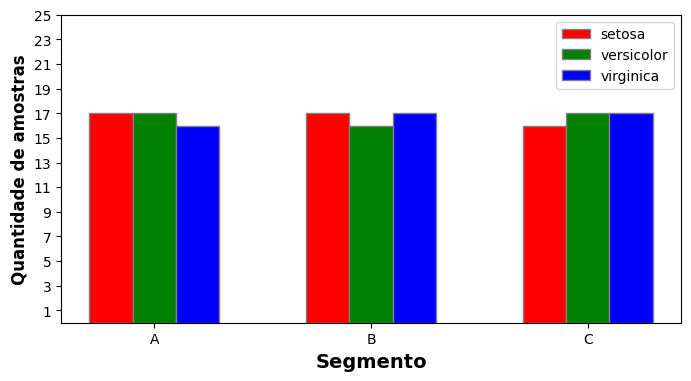

In [3]:
# set width of bar 
barWidth = 0.20
fig = plt.subplots(figsize =(8, 4)) 
 
# Set position of bar on X axis 
br1 = np.arange(3) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.bar(br1, [iris.YA.count(0), iris.YB.count(0), iris.YC.count(0)], color ='r', width = barWidth, 
        edgecolor ='grey', label ='setosa') 
plt.bar(br2, [iris.YA.count(1), iris.YB.count(1), iris.YC.count(1)], color ='g', width = barWidth, 
        edgecolor ='grey', label ='versicolor') 
plt.bar(br3, [iris.YA.count(2), iris.YB.count(2), iris.YC.count(2)], color ='b', width = barWidth, 
        edgecolor ='grey', label ='virginica') 
 
# Adding Xticks 
plt.xlabel('Segmento', fontweight ='bold', fontsize = 14) 
plt.ylabel('Quantidade de amostras', fontweight ='bold', fontsize = 12) 
plt.xticks([r + barWidth for r in range(3)], 
        ['A', 'B', 'C'])
plt.yticks([1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25])
 
plt.legend()
plt.show() 

---

# **Árvore de Decisão**

## Primeiro: Treinamento (A+B) e Teste (C)

In [4]:
clf1 = DecisionTreeClassifier()

clf1 = clf1.fit(iris.XA+iris.XB, iris.YA+iris.YB)

YC_pred = clf1.predict(iris.XC)

### Métricas

In [5]:
acur1 = metrics.accuracy_score(iris.YC, YC_pred)
mcm = metrics.multilabel_confusion_matrix(iris.YC, YC_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
sens1 = tp / (tp + fn)
espe1 = tn / (tn + fp)
prec1 = metrics.precision_score(iris.YC, YC_pred, average=None)

print("Acuracia:", acur1)

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Sensitividade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {sens1[0]:.8f} | {sens1[1]:.8f} | {sens1[2]:.8f} | {np.mean(sens1):.8f} |')
print("|___________________________________________________|")

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Especificidade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {espe1[0]:.8f} | {espe1[1]:.8f} | {espe1[2]:.8f} | {np.mean(espe1):.8f} |')
print("|___________________________________________________|")


print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|---------------------Precisao----------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {prec1[0]:.8f} | {prec1[1]:.8f} | {prec1[2]:.8f} | {np.mean(prec1):.8f} |')
print("|___________________________________________________|")

Acuracia: 0.94

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Sensitividade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.88235294 | 0.94117647 | 0.94117647 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Especificidade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.96969697 | 0.93939394 | 0.96969697 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|---------------------Precisao----------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.93750000 | 0.88888889 | 0.94212963 |
|___________________________________________________|


### Estrutura da Árvore

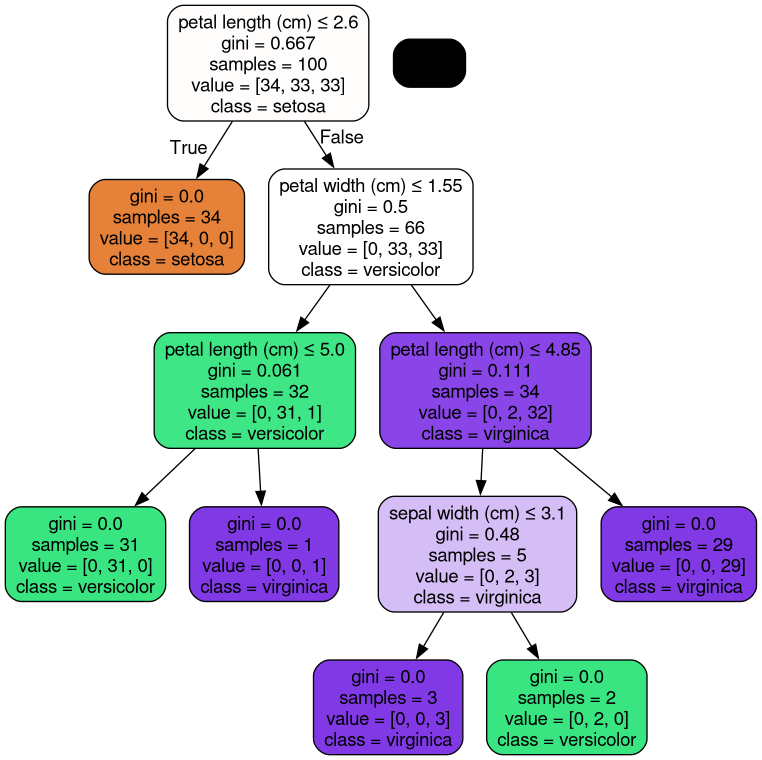

In [6]:
dot_data = StringIO()
export_graphviz(clf1, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.indice,class_names=iris.metas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<br/>

## Segundo: Treinamento (A+C) e Teste (B)

In [7]:
clf2 = DecisionTreeClassifier()

clf2 = clf2.fit(iris.XA+iris.XC, iris.YA+iris.YC)

YB_pred = clf2.predict(iris.XB)

### Métricas

In [8]:
acur2 = metrics.accuracy_score(iris.YB, YB_pred)
mcm = metrics.multilabel_confusion_matrix(iris.YB, YB_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
sens2 = tp / (tp + fn)
espe2 = tn / (tn + fp)
prec2 = metrics.precision_score(iris.YB, YB_pred, average=None)

print("Acuracia:", acur2)

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Sensitividade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {sens2[0]:.8f} | {sens2[1]:.8f} | {sens2[2]:.8f} | {np.mean(sens2):.8f} |')
print("|___________________________________________________|")

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Especificidade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {espe2[0]:.8f} | {espe2[1]:.8f} | {espe2[2]:.8f} | {np.mean(espe2):.8f} |')
print("|___________________________________________________|")


print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|---------------------Precisao----------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {prec2[0]:.8f} | {prec2[1]:.8f} | {prec2[2]:.8f} | {np.mean(prec2):.8f} |')
print("|___________________________________________________|")

Acuracia: 0.94

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Sensitividade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.93750000 | 0.88235294 | 0.93995098 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Especificidade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.94117647 | 0.96969697 | 0.97029115 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|---------------------Precisao----------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.88235294 | 0.93750000 | 0.93995098 |
|___________________________________________________|


### Estrutura da Árvore

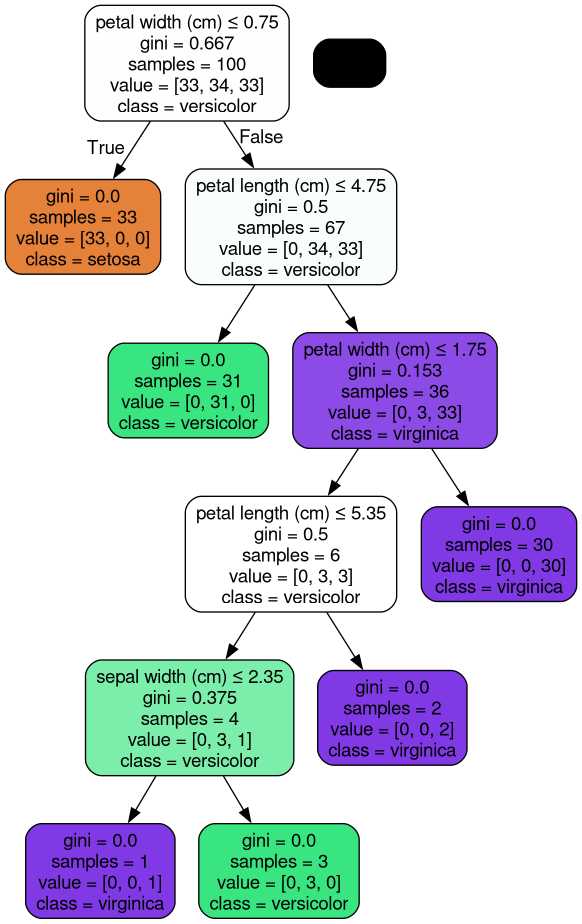

In [9]:
dot_data = StringIO()
export_graphviz(clf2, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.indice,class_names=iris.metas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

<br/>

## Terceiro: Treinamento (C+B) e Teste (A)

In [10]:
clf3 = DecisionTreeClassifier()

clf3 = clf3.fit(iris.XC+iris.XB, iris.YC+iris.YB)

YA_pred = clf3.predict(iris.XA)

### Métricas

In [11]:
acur3 = metrics.accuracy_score(iris.YA, YA_pred)
mcm = metrics.multilabel_confusion_matrix(iris.YA, YA_pred)
tn = mcm[:, 0, 0]
tp = mcm[:, 1, 1]
fn = mcm[:, 1, 0]
fp = mcm[:, 0, 1]
sens3 = tp / (tp + fn)
espe3 = tn / (tn + fp)
prec3 = metrics.precision_score(iris.YA, YA_pred, average=None)

print("Acuracia:", acur3)

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Sensitividade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {sens3[0]:.8f} | {sens3[1]:.8f} | {sens3[2]:.8f} | {np.mean(sens3):.8f} |')
print("|___________________________________________________|")

print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|-------------------Especificidade-------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {espe3[0]:.8f} | {espe3[1]:.8f} | {espe3[2]:.8f} | {np.mean(espe3):.8f} |')
print("|___________________________________________________|")


print("\n|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|")
print("|---------------------Precisao----------------------|")
print(f'|   Setosa   | Versicolor | Virginica  |   Media    |')
print(f'| {prec3[0]:.8f} | {prec3[1]:.8f} | {prec3[2]:.8f} | {np.mean(prec3):.8f} |')
print("|___________________________________________________|")

Acuracia: 0.86

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Sensitividade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.76470588 | 0.81250000 | 0.85906863 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|-------------------Especificidade-------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.90909091 | 0.88235294 | 0.93048128 |
|___________________________________________________|

|‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾|
|---------------------Precisao----------------------|
|   Setosa   | Versicolor | Virginica  |   Media    |
| 1.00000000 | 0.81250000 | 0.76470588 | 0.85906863 |
|___________________________________________________|


### Estrutura da Árvore

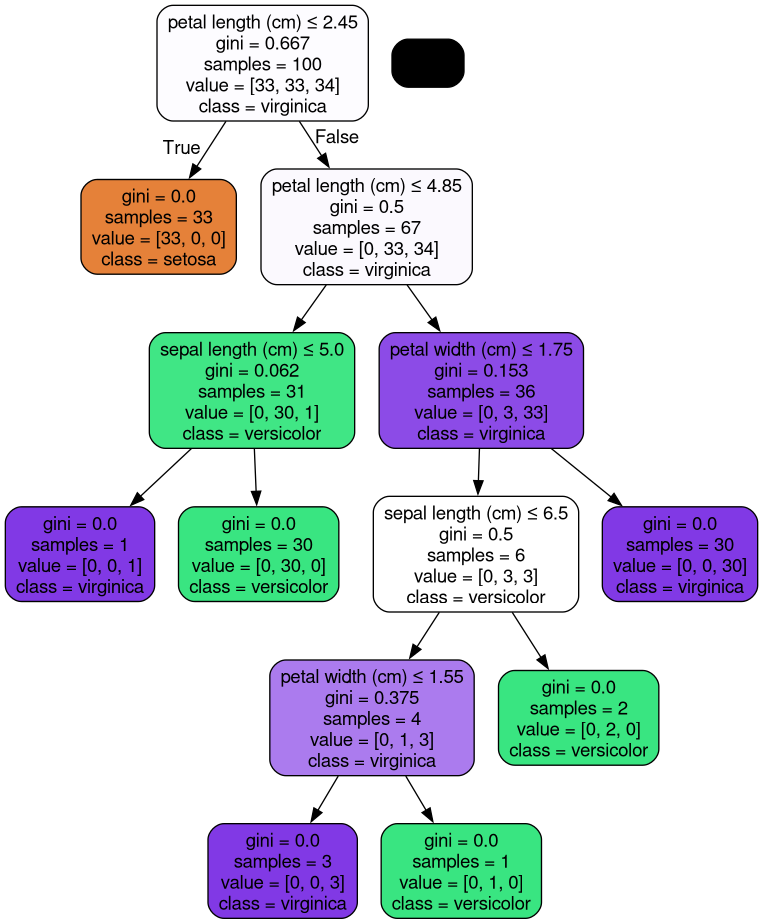

In [12]:
dot_data = StringIO()
export_graphviz(clf3, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = iris.indice,class_names=iris.metas)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())